In [273]:
library(tidyverse)
library(repr)
library(ggplot2)

In [302]:
sessions <- read_csv("data/sessions.csv")

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [303]:
players <- read_csv("data/players.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [304]:
sessions_summarized <- summary(sessions)
sessions_summarized

players_summarized <- summary(players)
players_summarized

players_experience <- unique(players$experience)
players_experience

players_gender <- unique(players$gender)
players_gender

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

[1] "Pro"      "Veteran"  "Amateur"  "Regular"  "Beginner"

[1] "Male"              "Female"            "Non-binary"       
[4] "Prefer not to say" "Agender"           "Two-Spirited"     
[7] "Other"

## **Data Frame Observations**

### **Sessions**

**Number of Observations**: 1535

**Number of Variables**: 5

**hashedEmail (chr)**: hashed/hidden email of each user

**start_time (chr)**: the time where a player began their gaming session 

**end_time (chr)**: the time where a player stopped/concluded their gaming session

**original_start_time (dbl)**: the time where a player began their gaming session in milliseconds (mean: 1.719e+12)

**original_end_time (dbl)**: the time where a player stopped/concluded their gaming session in milliseconds (mean: 1.719e+12)

### **Players**

**Number of Observations**: 196

**Number of Variables**: 7

**experience (chr)**: the level of experience each player has in the game (5 subcategories: Pro, Veteran, Amateur, Regular, Beginner)

**subscribe (lgl)**: whether or not the player has subscribed to a game-related newsletter

**hashedEmail (chr)**: hashed/hidden email of each player

**played_hours (dbl)**: the amount of time each player has spent playing the game (mean: 5.846)

**name (chr)**: the first name of each player

**gender (chr)**: the gender of each user (7 subcategories: Male, Female, Non-binary, Prefer not to say, Agender, Two-Spirited, Other)

**Age (dbl)**: the age of each player in years (mean: 21.14)


## **Broad Question:**

### **Question 2:** 
Which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

## **Specific Question:**
Do more experienced players contribute more total gameplay time and sessions than less experienced players?

In [414]:
# Changing the time values for the original start time and original end time to be more readable
sessions <- sessions |>
    mutate(original_end_time = as.numeric(as.POSIXct(end_time, format = "%d/%m/%Y %H:%M")),
           original_start_time = as.numeric(as.POSIXct(start_time, format = "%d/%m/%Y %H:%M")))

In [415]:
# Joined players and sessions
player_data <- players |>
  left_join(sessions, by = "hashedEmail")

In [416]:
# Created a session summary for each player including total sessions played and total session time per player
session_summary <- sessions |>
  group_by(hashedEmail) |>
  summarise(total_sessions = n())

In [417]:
# Final joined dataset
final_data <- players |>
 left_join(session_summary, by = "hashedEmail")

In [447]:
# Sorted the data in descending order
final_data_sorted <- final_data |>
  arrange(desc(played_hours))
final_data_sorted

experience,subscribe,hashedEmail,played_hours,name,gender,Age,total_sessions
<fct>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>
Regular,TRUE,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,223.1,Hiroshi,Male,17,219
Regular,TRUE,b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,218.1,Akio,Non-binary,20,95
Regular,TRUE,ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,178.2,Piper,Female,19,147
Amateur,TRUE,f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,150.0,Delara,Female,16,159
Amateur,TRUE,fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,56.1,Dana,Male,23,310
Amateur,TRUE,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,53.9,Alex,Male,17,130
Amateur,TRUE,a175d4741dc84e6baf77901f6e8e0a06f54809a34e6b5211159bced346f7fb3e,48.4,Xander,Female,17,37
Amateur,TRUE,24d4892c2c3ce11d3e54c3bf31ee218901cac7a2f564911d67424c8fdf0874fe,32.0,Sidney,Male,22,79
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,27


Warning message in scale_y_continuous(trans = "log10"):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 14 rows containing missing values or values outside the scale range
(`geom_bar()`).”


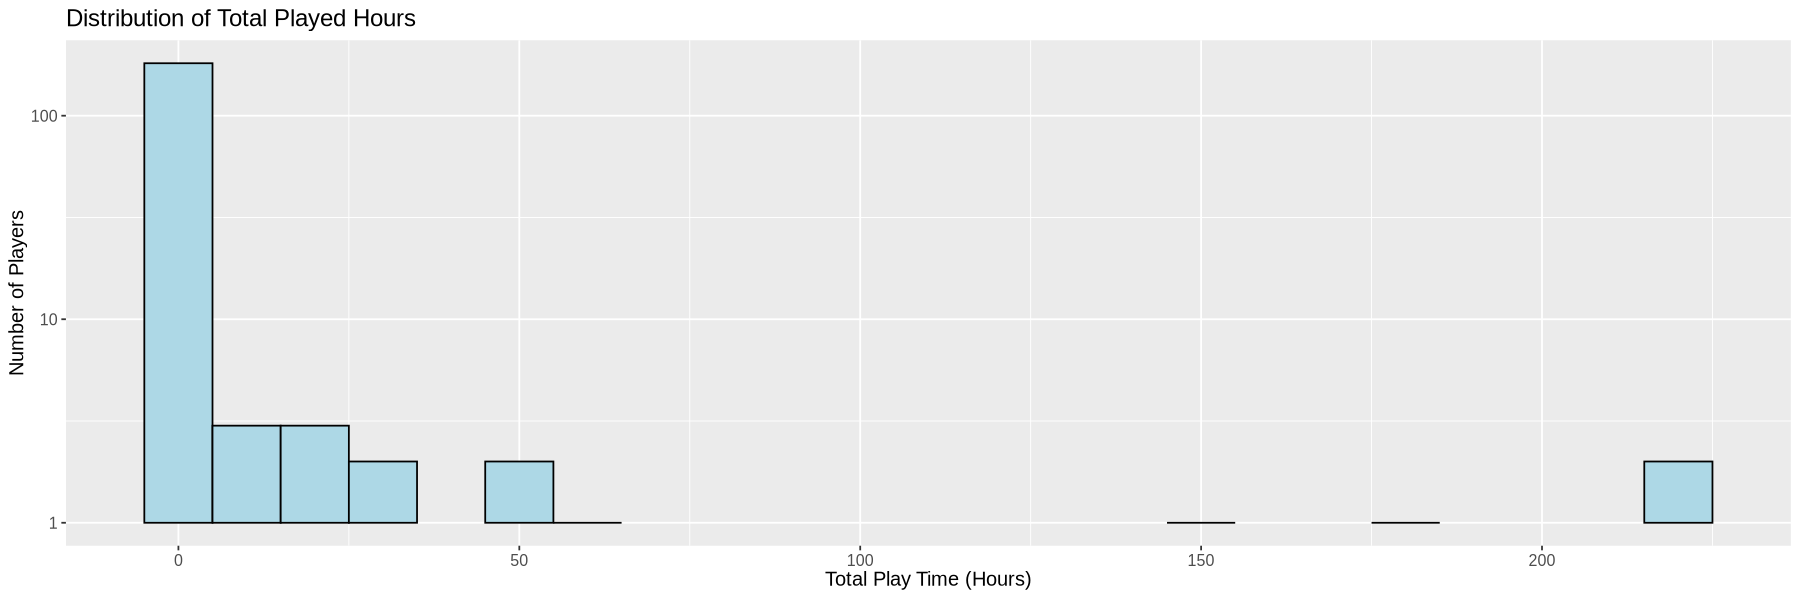

In [448]:
# Graph for the Distribution of Total Play Time (Hours)
options(repr.plot.width = 15, repr.plot.height = 5) 

played_hours_plot <- ggplot(final_data, aes(x = played_hours)) +
  geom_histogram(binwidth = 10, fill = "lightblue", color = "black") +
  labs(
    title = "Distribution of Total Played Hours",
    x = "Total Play Time (Hours)",
    y = "Number of Players") +
  theme(text = element_text(size = 12)) +
  scale_y_continuous(trans  = "log10")

played_hours_plot

Warning message:
“Removed 71 rows containing non-finite outside the scale range (`stat_bin()`).”


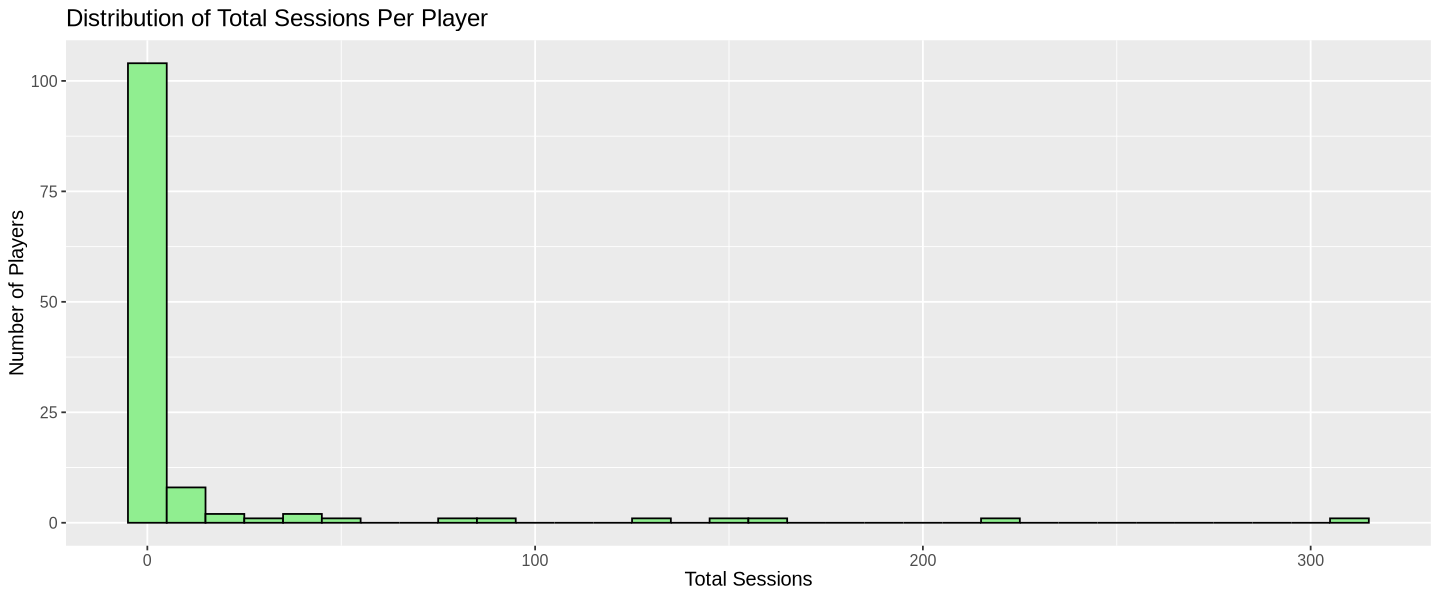

In [449]:
# Graph for the Distribution of Total Sessions Per Player
options(repr.plot.width = 12, repr.plot.height = 5) 

total_sessions_plot <- ggplot(final_data, aes(x = total_sessions)) +
  geom_histogram(binwidth = 10, fill = "lightgreen", color = "black") +
  labs(
    title = "Distribution of Total Sessions Per Player",
    x = "Total Sessions",
    y = "Number of Players") +
  theme(text = element_text(size = 12))
total_sessions_plot

In [450]:
# Ordered the final_data experience from lowest experience to highest
final_data <- final_data |>
  mutate(experience = factor(experience,
                             levels = c("Beginner", "Regular", "Amateur", "Veteran", "Pro")))

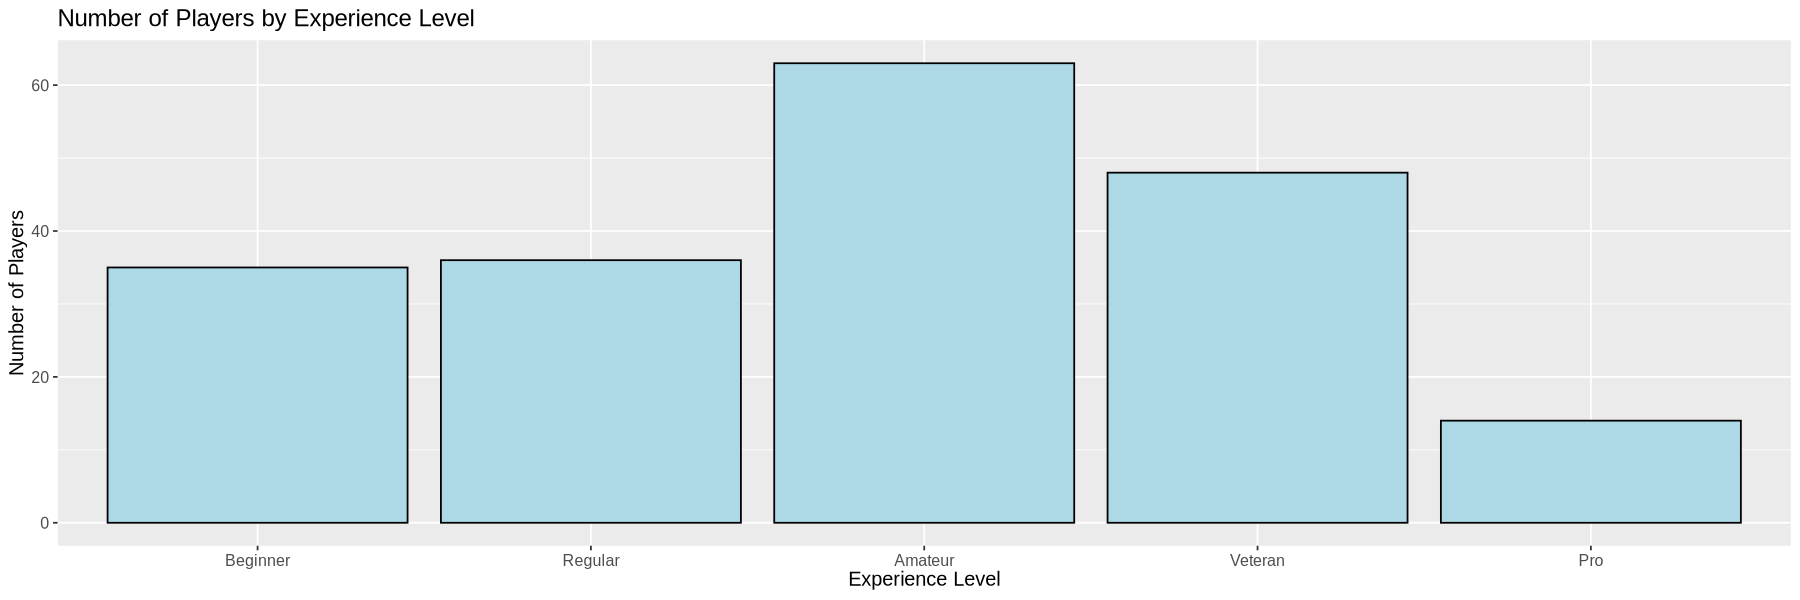

In [451]:
# Graph for the Distribution of Number of Players by Experience Level
options(repr.plot.width = 15, repr.plot.height = 5) 

experience_plot <- ggplot(final_data, aes(x = experience)) +
  geom_bar(fill = "lightblue", color = "black") +
  labs(
    title = "Number of Players by Experience Level",
    x = "Experience Level",
    y = "Number of Players") +
  theme(text = element_text(size = 12))
experience_plot 

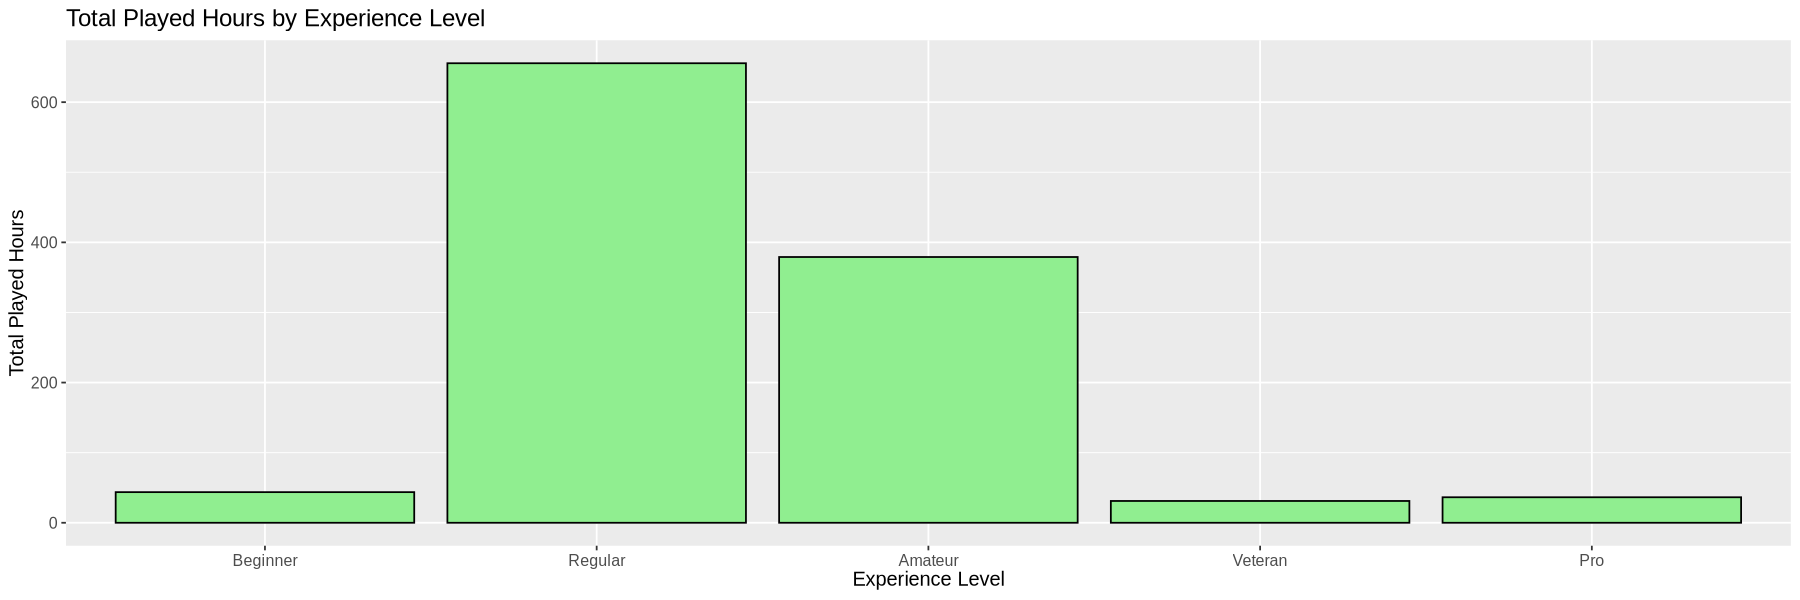

In [452]:
# Graph for the Distribution of Total Play Time by Experience Level
experience_summary <- final_data |>
  group_by(experience) |>
  summarise(total_played_hours = sum(played_hours, na.rm = TRUE))

options(repr.plot.width = 15, repr.plot.height = 5) 

experience_summary_plot <- ggplot(experience_summary, aes(x = experience, y = total_played_hours)) +
  geom_bar(stat = "identity", fill = "lightgreen", color = "black") +
  labs(
    title = "Total Played Hours by Experience Level",
    x = "Experience Level",
    y = "Total Played Hours"
  ) +
 theme(text = element_text(size = 12))
experience_summary_plot

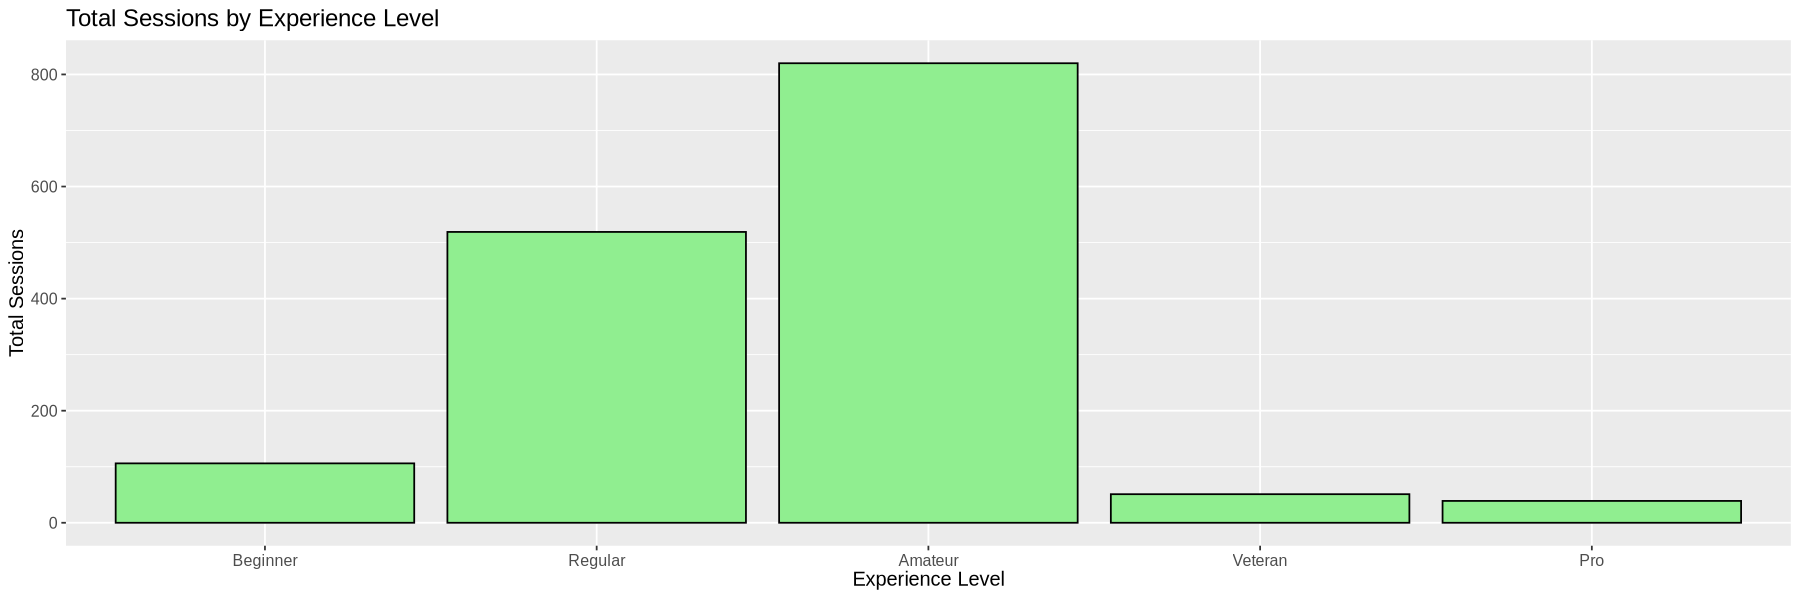

In [453]:
# Graph for the Distribution of Total Number of Sessions by Experience Level
options(repr.plot.width = 15, repr.plot.height = 5) 

experience_sessions_summary <- final_data |>
  group_by(experience) |>
  summarise(total_sessions = sum(total_sessions, na.rm = TRUE))

experience_sessions_summary_plot <- ggplot(experience_sessions_summary, aes(x = experience, y = total_sessions)) +
  geom_bar(stat = "identity", fill = "lightgreen", color = "black") +
  labs(
    title = "Total Sessions by Experience Level",
    x = "Experience Level",
    y = "Total Sessions") + 
theme(text = element_text(size = 12))
experience_sessions_summary_plot

Warning message:
“Removed 71 rows containing missing values or values outside the scale range
(`geom_point()`).”


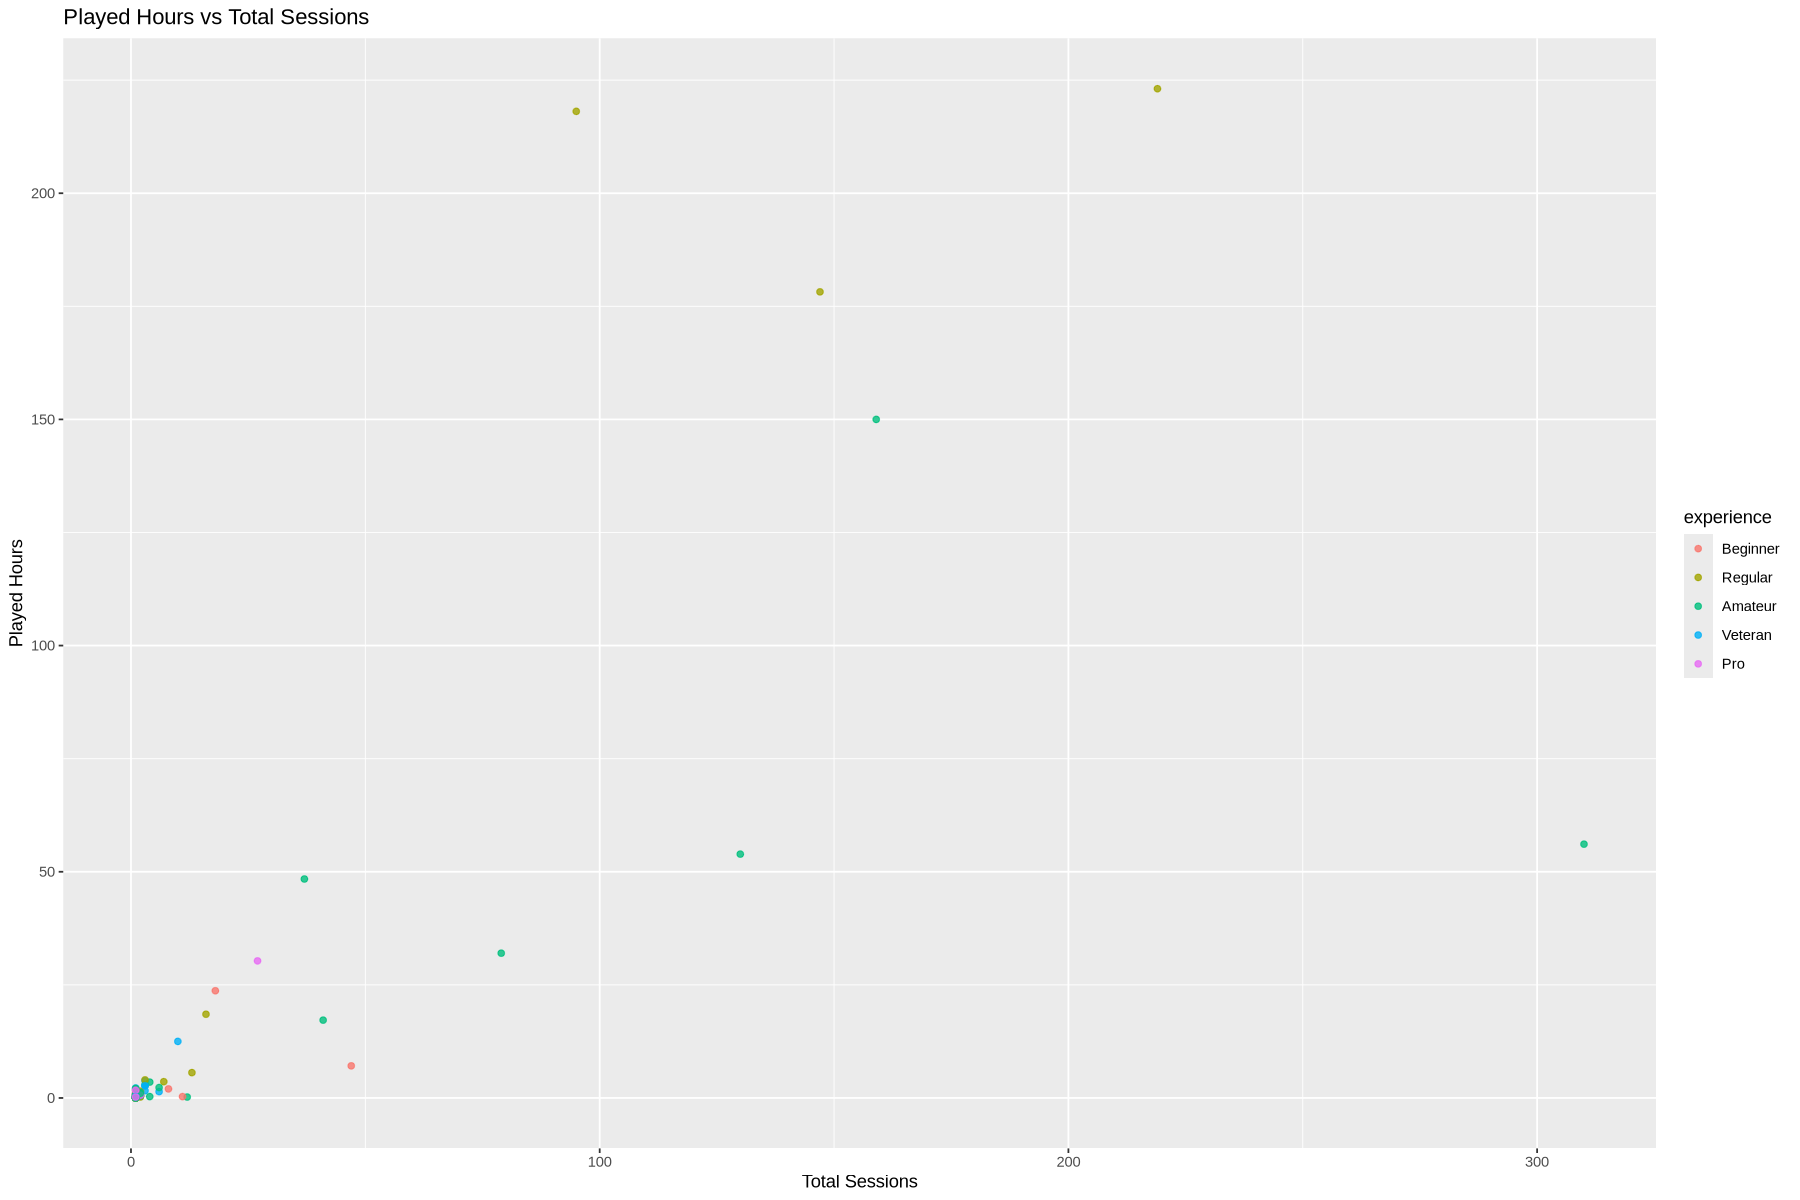

In [454]:
options(repr.plot.width = 15, repr.plot.height = 10) 

played_hours_vs_sessions_plot <- ggplot(final_data, aes(x = total_sessions, y = played_hours, color = experience)) +
  geom_point(alpha = 0.8) +
  labs(
    title = "Played Hours vs Total Sessions",
    x = "Total Sessions",
    y = "Played Hours"
  )
played_hours_vs_sessions_plot

Warning message:
“Removed 71 rows containing missing values or values outside the scale range
(`geom_point()`).”


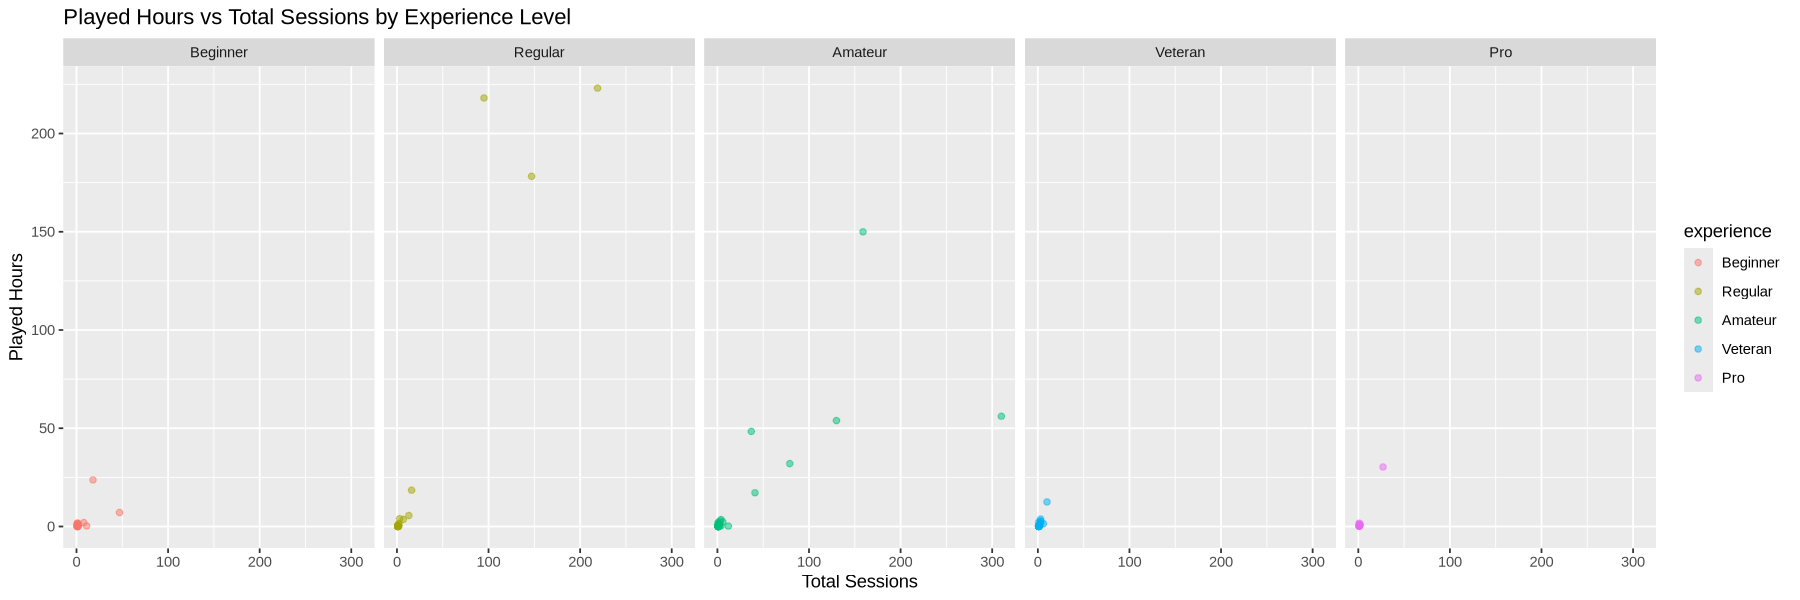

In [455]:
options(repr.plot.width = 15, repr.plot.height = 5) 

seperated_played_hours_vs_sessions_plot <- ggplot(final_data, aes(x = total_sessions, y = played_hours, color = experience)) +
  geom_point(alpha = 0.5) +
  facet_grid(. ~ experience) +  
  labs(
    title = "Played Hours vs Total Sessions by Experience Level",
    x = "Total Sessions",
    y = "Played Hours"
  )
seperated_played_hours_vs_sessions_plot